In [28]:
# 2. Disease prediction (bonus)

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [30]:
# read the data
df_heart=pd.read_csv('Data3/cardio_train.csv', delimiter=';', index_col=0)

In [31]:
# df_heart
# df_heart.info()
df_heart

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1


Utforska om det finns några konstigheter i datan

In [32]:
# df_heart['active'].describe() # Ok
# df_heart['alco'].describe() # ok
# df_heart['cardio'].describe() # ok
# df_heart['cholesterol'].describe() # 0k
# df_heart['age'].describe() # ok
# df_heart['gender']. value_counts() # Ok
# df_heart['gluc'].value_counts() # Ok
# df_heart['smoke'].value_counts() # Ok


# df_heart['ap_hi'].describe() # - investigate, min value
# df_heart['ap_lo'].describe() # - investigate, min value
# df_heart['height'].describe() # - investigate, min value 55?
# df_heart['weight'].describe() # - investigate, min 10, max 200?

# 2.0 - EDA uppvärmning

## a) Hur många är positiva för hjärt-kärlsjukdom och hur många är negativa?

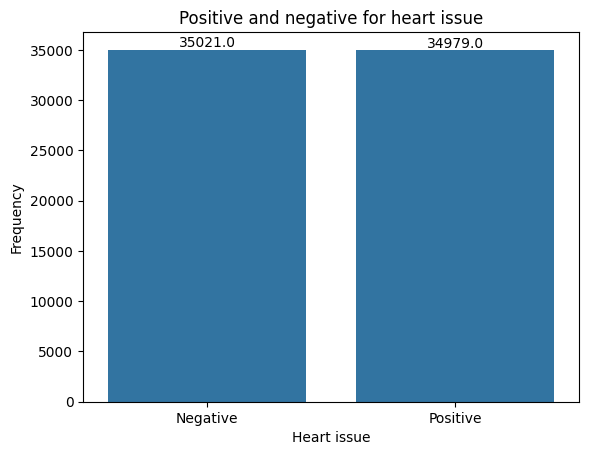

In [33]:

df_heart['Cardio'] = df_heart['cardio'].replace({0: 'Negative', 1: 'Positive'})
ax=sns.countplot(x='Cardio', data=df_heart)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()-700), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Add labels and title
plt.xlabel('Heart issue')
plt.ylabel('Frequency')
plt.title('Positive and negative for heart issue')

plt.show()

b) Hur stor andel har normala, över normala och långt över normala kolesterolvärden? Rita ett tårtdiagram.

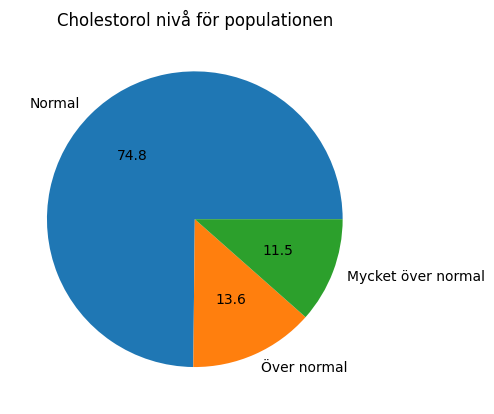

In [34]:
df_heart['Chol']=df_heart['cholesterol'].replace({1:'Normal', 2:'Över normal', 3:'Mycket över normal'})

# fixa tårt diagram

#sns.countplot(x='Chol', data=df_heart)

pal_col= sns.color_palette('dark')

df_heart['Chol'].value_counts().plot(kind='pie',autopct='%.1f')


plt.title('Cholestorol nivå för populationen')
plt.xlabel('')
plt.ylabel('')

plt.show()


c) Hur ser åldersfördelningen ut? Rita ett histogram.

<Axes: xlabel='age', ylabel='Count'>

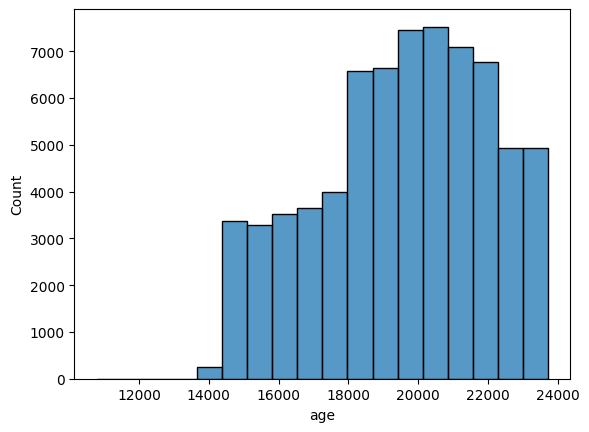

In [35]:
sns.histplot(df_heart['age'], binwidth= 700,)

d) Hur stor andel röker?


In [36]:
df_heart['smoke'].value_counts()

smoke
0    63831
1     6169
Name: count, dtype: int64

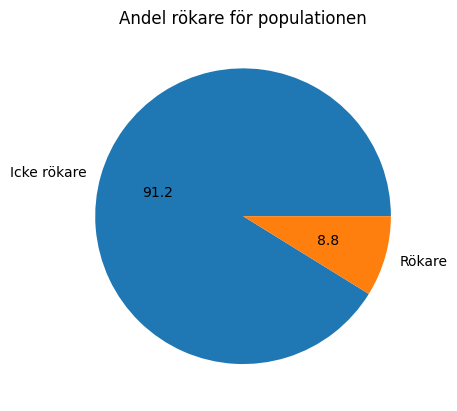

In [37]:
df_heart['Smoke']=df_heart['smoke'].replace({0:'Icke rökare', 1:'Rökare'})

pal_col= sns.color_palette('dark')

df_heart['Smoke'].value_counts().plot(kind='pie',autopct='%.1f')

plt.title('Andel rökare för populationen')
plt.xlabel('')
plt.ylabel('')

plt.show()

e) Hur ser viktfördelningen ut? Rita lämpligt diagram.


In [38]:
df_heart['weight'].describe()

count    70000.000000
mean        74.205690
std         14.395757
min         10.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: weight, dtype: float64

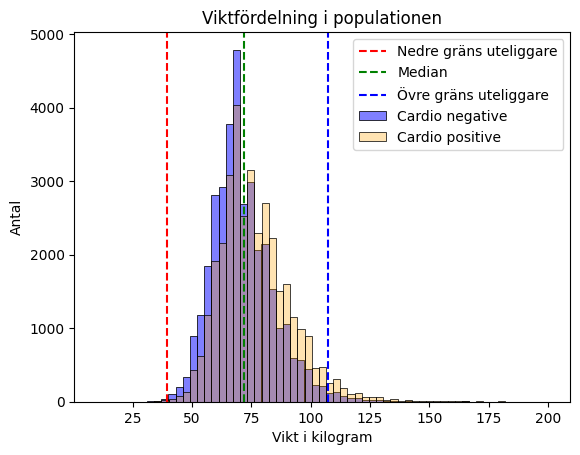

In [39]:
# Fixa så att vi får vikterna för resp kategori

cardio_negatives = df_heart[df_heart['cardio'] == 0]['weight']
cardio_positives = df_heart[df_heart['cardio'] == 1]['weight']

# Skapa histogram för positiva och negativa
sns.histplot(data=cardio_negatives, color='blue', alpha=0.5, label='Cardio negative', binwidth=3)
sns.histplot(data=cardio_positives, color='orange', alpha=0.3, label='Cardio positive', binwidth=3)

plt.title('Viktfördelning i populationen')

q1 = np.percentile(df_heart['weight'], 25)
q2 = np.percentile(df_heart['weight'], 50)
q3 = np.percentile(df_heart['weight'], 75)

# Beräkna uteliggare (nedre och övdre gräns)

low_out=q1-(q3-q1)*1.5
high_out=q3+(q3-q1)*1.5

# Lägg till horizontella linjer för uteliggare och median
plt.axvline(low_out, color='r', linestyle='--', label='Nedre gräns uteliggare')
plt.axvline(q2, color='g', linestyle='--', label='Median')
plt.axvline(high_out, color='b', linestyle='--', label='Övre gräns uteliggare')

# Lägg till fig. legend
plt.legend()

plt.ylabel('Antal')
plt.xlabel('Vikt i kilogram')
#plt.ylim(10, 250)

plt.show()

f) Hur ser längdfördelningen ut? Rita lämpligt diagram.


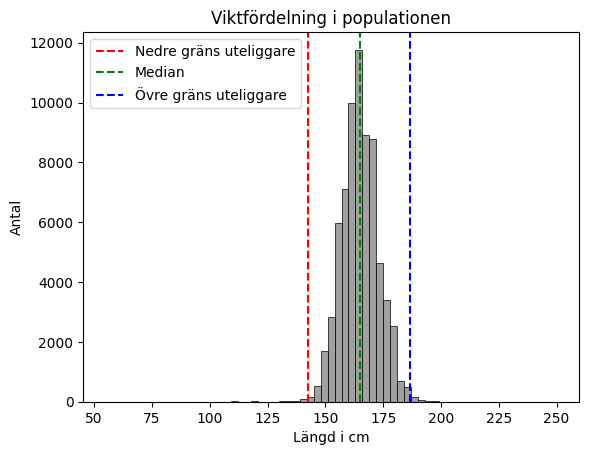

In [40]:

sns.histplot(data=df_heart['height'], color='grey', binwidth=3)

plt.title('Viktfördelning i populationen')

q1 = np.percentile(df_heart['height'], 25)
q2 = np.percentile(df_heart['height'], 50)
q3 = np.percentile(df_heart['height'], 75)

# Beräkna uteliggare (nedre och övdre gräns)

low_out=q1-(q3-q1)*1.5
high_out=q3+(q3-q1)*1.5

# Lägg till horizontella linjer för uteliggare och median
plt.axvline(low_out, color='r', linestyle='--', label='Nedre gräns uteliggare')
plt.axvline(q2, color='g', linestyle='--', label='Median')
plt.axvline(high_out, color='b', linestyle='--', label='Övre gräns uteliggare')

# Lägg till fig. legend
plt.legend()

plt.ylabel('Antal')
plt.xlabel('Längd i cm')
#plt.ylim(10, 250)

plt.show()

g) Hur stor andel av kvinnor respektive män har hjärt-kärlsjukdom? Rita lämpligt diagram

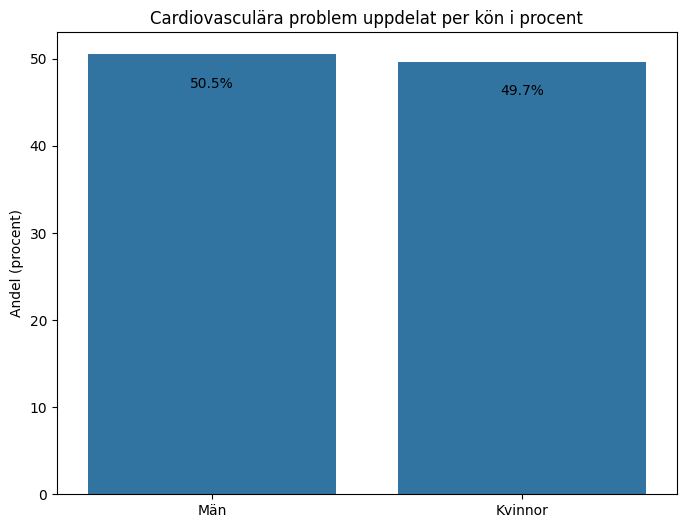

In [41]:
# gender 1 - women, 2 - men

women=df_heart[df_heart['gender']==1]['gender'].count()
men=df_heart[df_heart['gender']==2]['gender'].count()

women_cardio=df_heart[(df_heart['cardio']==1) & (df_heart['gender']==1)]['cardio'].count()
men_cardio=df_heart[(df_heart['cardio']==1) & (df_heart['gender']==2)]['cardio'].count()


# Data to plot
labels = ['Män','Kvinnor']
datas = [men_cardio/men*100, women_cardio/women*100]
plt.figure(figsize=(8, 6))
ax=sns.barplot(x=labels, y=datas)

for p in ax.patches:
    ax.annotate(f'{round(p.get_height(), 1)}%', (p.get_x() + p.get_width() / 2., p.get_height()-5), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Cardiovasculära problem uppdelat per kön i procent')
plt.ylabel('Andel (procent)')
plt.show()

## 2.1.0 - Feature engineering BMI

Skapa en feature för BMI (Body Mass Index)

BMI= $\frac{vikt}{längd^{2}}$

In [42]:

df_heart['BMI']=df_heart['weight']/((df_heart['height']/100)**2)

df_heart['BMI'].describe()

count    70000.000000
mean        27.556513
std          6.091511
min          3.471784
25%         23.875115
50%         26.374068
75%         30.222222
max        298.666667
Name: BMI, dtype: float64

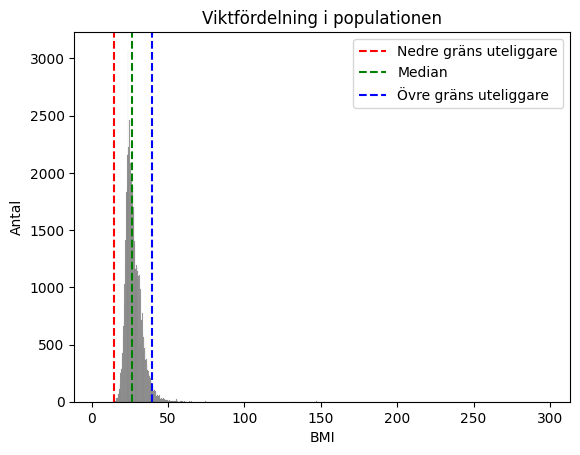

In [43]:
sns.histplot(data=df_heart['BMI'], color='grey')

plt.title('Viktfördelning i populationen')

q1 = np.percentile(df_heart['BMI'], 25)
q2 = np.percentile(df_heart['BMI'], 50)
q3 = np.percentile(df_heart['BMI'], 75)

# Beräkna uteliggare (nedre och övdre gräns)

low_out=q1-(q3-q1)*1.5
high_out=q3+(q3-q1)*1.5

low_out2=q1-(q3-q1)*3
high_out2=q3+(q3-q1)*3

# Lägg till horizontella linjer för uteliggare och median
plt.axvline(low_out, color='r', linestyle='--', label='Nedre gräns uteliggare')
plt.axvline(q2, color='g', linestyle='--', label='Median')
plt.axvline(high_out, color='b', linestyle='--', label='Övre gräns uteliggare')

# Lägg till fig. legend
plt.legend()

plt.ylabel('Antal')
plt.xlabel('BMI')
#plt.ylim(10, 250)

plt.show()

<ul>
<li> Severely underweight - BMI less than 16.5kg/m^2 
<li> Underweight - BMI under 18.5 kg/m^2
<li> Normal weight - BMI greater than or equal to 18.5 to 24.9 kg/m^2
<li> Overweight – BMI greater than or equal to 25 to 29.9 kg/m^2
<li>Obesity – BMI greater than or equal to 30 kg/m^2
    <ul>
    <li>Obesity class I – BMI 30 to 34.9 kg/m^2
    <li>Obesity class II – BMI 35 to 39.9 kg/m^2
    <li>Obesity class III – BMI greater than or equal to 40 kg/m^2 (also referred to as severe, extreme, or massive obesity)
    </ul>
</ul>
<ref>BMI Classification Percentile And Cut Off Points. Connor B. Weir; Arif Jan. Treasure Island (FL): StatPearls Publishing; 2024 Jan</ref>

Eftersom det finns en del extremvärden (höga BMIs) så finns det anledning att tro att BMI > 57 är felaktiga. När det gäller låga BMI så anses det att BMI<10 är ovanliga.
"Mortality in extremely low BMI anorexia nervosa patients – implications of gastrointestinal and endocrine system dysfunction",
Suszko M., Sobocki J., Imieliński C., Psychiatr Pol 2022;56(1):89-100

Detta får tyll följd att vi i denna undersökning bara beaktar personer med BMI i intervallet 11 till 56.

b) Skapa en kategorisk BMI-feature med kategorierna: normal range, overweight, obese (class I), obese (class II), obese (class III)

In [44]:
# definition av viktgränser enligt ovan, inspirerat från Stackoverflow

BMI_classes = [
    (df_heart['BMI'] < 16.5),
    (df_heart['BMI'] >= 16.5) & (df_heart['BMI'] <18.5),
    (df_heart['BMI'] >= 18.5) & (df_heart['BMI'] <=24.9),
    (df_heart['BMI'] > 24.9) & (df_heart['BMI'] <=29.9),
    (df_heart['BMI'] > 29.9) & (df_heart['BMI'] <=34.9),
    (df_heart['BMI'] > 34.9) & (df_heart['BMI'] <=39.9),
    (df_heart['BMI'] > 39.9)
]
# tillhörande kategorier
kategorier = ['allvarligt underviktig', 'underviktig', 'normal','överviktig','fetma klass I', 'fetma klass II','fetma klass III']

# lägg till kategorisk variabel BMI_grupp
df_heart['BMI_grupp'] = np.select(BMI_classes, kategorier, default='Unknown')



2.1.1 - Feature engineering blodtryck

Enligt tabell i artikeln:
<table>
<tr><td></td><td>systolic</td><td>diastolic</td></tr>
<tr><td>friskt</td><td><120</td><td><80</td></tr>
<tr><td>förhöjt</td><td>120-129</td><td><80</td></tr>
<tr><td>stadie1 hypertension</td><td>130-139</td><td>eller 80-89</td></tr>
<tr><td>stadie 2 hypertension</td><td>140 -180</td><td>eller 90-120</td></tr>
<tr><td>kritiskt</td><td>>180</td><td>eller >120</td></tr>
</table>

Gränserna för diastoliskt och systoliskt blodtryck är satta efter tabellen och 
undersökning av fördelningen av data

systoliskt mellan 40-230
diastoliskt mellan 40-130

In [74]:
# ap_hi -> Systolic blood pressure
# ap_lo -> Diastolic blood pressure

df_heart=df_heart[(df_heart['ap_hi']>40) & (df_heart['ap_hi']<230)]
df_heart=df_heart[(df_heart['ap_lo']>40) & (df_heart['ap_lo']<130)]

BP_classes = [
    (df_heart['ap_hi'] <120) & (df_heart['ap_lo']<=80),
    (df_heart['ap_hi'] >=120) & (df_heart['ap_hi'] <130) &(df_heart['ap_lo']<=80),
    ((df_heart['ap_hi'] >=130) & (df_heart['ap_hi'] <140)) | ((df_heart['ap_lo']>80) &(df_heart['ap_lo'] <=89)),
    ((df_heart['ap_hi'] >=140) & (df_heart['ap_hi'] <180)) | ((df_heart['ap_lo']>89) &(df_heart['ap_lo'] <120)),
    (df_heart['ap_hi'] >=120) | (df_heart['ap_lo']>=120),
]
# tillhörande kategorier för blortryck
kategorier = ['frisk', 'förhöjt','hypertention stadie 1','hypertention stadie 2', 'kritiskt']

# lägg till kategorisk variabel blodtryck
df_heart['BP_group'] = np.select(BP_classes, kategorier, default='Unknown')







2.2.0 - Visualisera andel sjukdomar


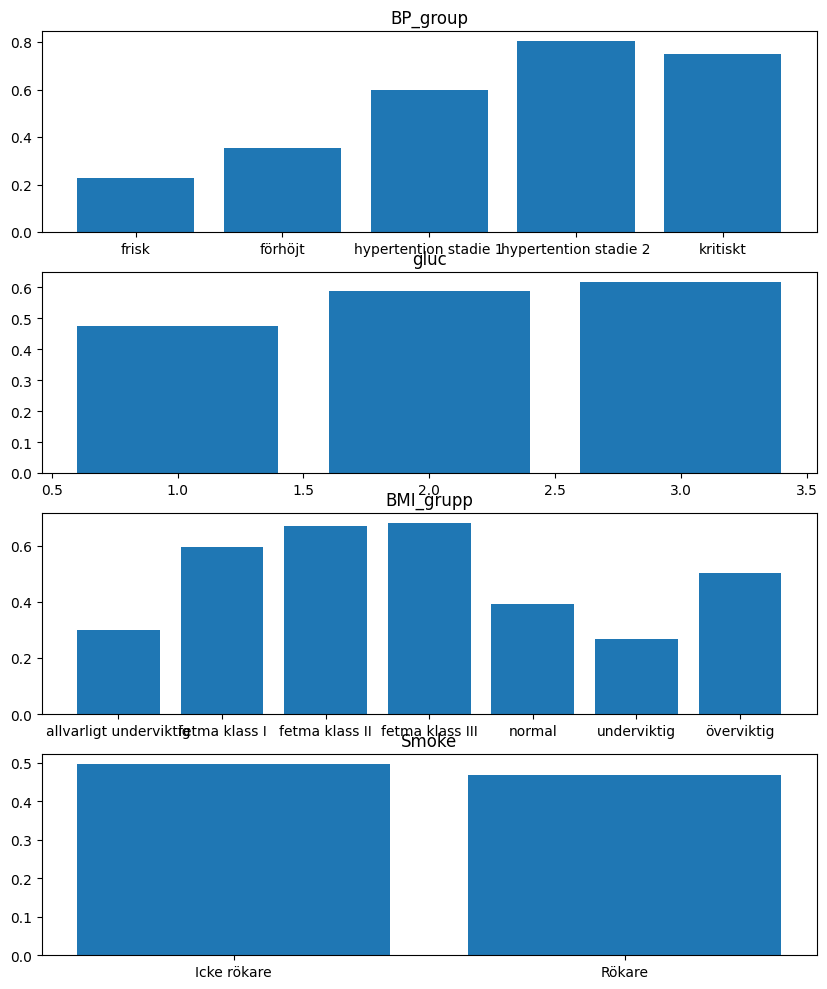

In [130]:

examine=['BP_group','gluc', 'BMI_grupp', 'Smoke']

fig, axes = plt.subplots(nrows=len(examine),ncols=1, figsize=(10,12))

i=0
for what in examine:
    data = df_heart[df_heart['cardio']==1].groupby(by=what)['cardio'].count() / df_heart.groupby(by=what)['cardio'].count()
    axes[i].bar(data.index, data)
    axes[i].set_title(what)
    i=i+1
plt.show()
    


2.2.1 - Visualisera korrelation - heatmap

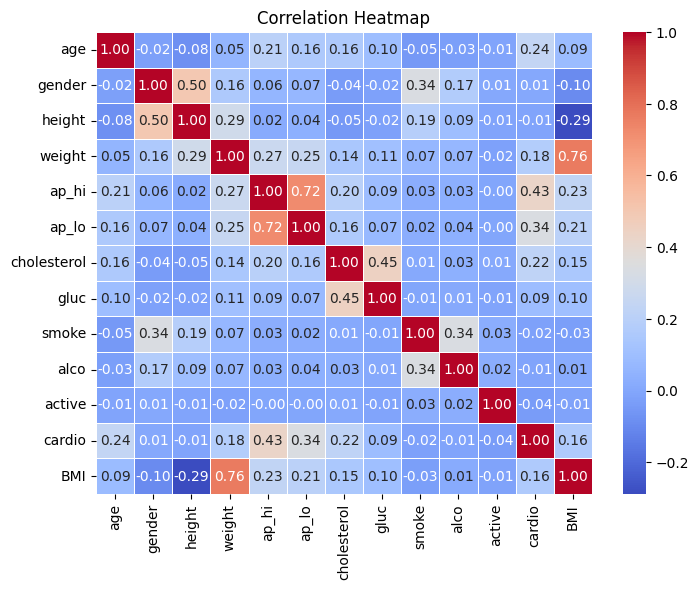

In [134]:
correlation_matrix = df_heart[['age','gender','height', 'weight', 'ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','cardio','BMI']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

att vikt och BMI är korrelerade beror på att BMI mått bygger på vikt. Samma sak med systoliskt och diastoliskt blodtryck.

2.2.2 - Ta bort korrelerade features
Från heatmap; weight och ap_lo bör tas bort då de har hög korrelation med BMI och ap_hi.

In [136]:
df_heart=df_heart.drop(['ap_lo','weight'], axis=1)


2.3 - Välja model
- train|validation|test split
- skala datasetet med feature standardization eller normalization
- definiera hyperparametrar (param_grids) att testa för varje modell
- använda GridSearchCV() och välja lämplig evalueringsmetric
- gör prediction på valideringsdata
- beräkna och spara evaluation score för ditt valda metric
- checka bästa parametrarna för respektive modell

In [144]:
from sklearn.model_selection import train_test_split

X, y = df_heart.drop(['cardio','Cardio','Chol', 'Smoke', 'BMI_grupp','BP_group'], axis=1), df_heart['cardio']
# splitta i test och träning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [145]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Hämtat från codealongs

scaler = StandardScaler()

# pipeline  KNN
pipe_KNN = Pipeline([("scaler", scaler), ("knn", KNeighborsClassifier())])

# pipeline  LogisticRegression
pipe_log_reg = Pipeline([("scaler", scaler), ("log", LogisticRegression(
    solver="saga", multi_class = "ovr", max_iter=10000, penalty="elasticnet"))])

# värt att pröva KNN - det är ju så "läkarnas kunskap" kommer till
param_grid_KNN = {"knn__n_neighbors": list(range(1, 50))}

# Justera l1 nivå
l1_ratio = np.linspace(0, 1, 20)
param_grid_log_reg = {"log__l1_ratio": l1_ratio}

# skapa själva GRID search för att hitta bästa modell
classifier_KNN = GridSearchCV(
    estimator=pipe_KNN, param_grid=param_grid_KNN, cv=5, scoring="accuracy")

classifier_log_reg = GridSearchCV(
    estimator=pipe_log_reg, param_grid=param_grid_log_reg, cv=5, scoring="accuracy"
)

# it will scale the data to X_train using StandardScaler
classifier_KNN.fit(X_train, y_train)

classifier_log_reg.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log',
                                        LogisticRegression(max_iter=10000,
                                                           multi_class='ovr',
                                                           penalty='elasticnet',
                                                           solver='saga'))]),
             param_grid={'log__l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])},
             scoring='accuracy')

In [146]:
classifier_log_reg.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('log',
   LogisticRegression(l1_ratio=0.42105263157894735, max_iter=10000,
                      multi_class='ovr', penalty='elasticnet', solver='saga'))],
 'verbose': False,
 'scaler': StandardScaler(),
 'log': LogisticRegression(l1_ratio=0.42105263157894735, max_iter=10000,
                    multi_class='ovr', penalty='elasticnet', solver='saga'),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'log__C': 1.0,
 'log__class_weight': None,
 'log__dual': False,
 'log__fit_intercept': True,
 'log__intercept_scaling': 1,
 'log__l1_ratio': 0.42105263157894735,
 'log__max_iter': 10000,
 'log__multi_class': 'ovr',
 'log__n_jobs': None,
 'log__penalty': 'elasticnet',
 'log__random_state': None,
 'log__solver': 'saga',
 'log__tol': 0.0001,
 'log__verbose': 0,
 'log__warm_start': False}

In [147]:
classifier_KNN.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=47))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=47),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 47,
 'knn__p': 2,
 'knn__weights': 'uniform'}

              precision    recall  f1-score   support

           0       0.72      0.77      0.75      5613
           1       0.74      0.69      0.72      5373

    accuracy                           0.73     10986
   macro avg       0.73      0.73      0.73     10986
weighted avg       0.73      0.73      0.73     10986



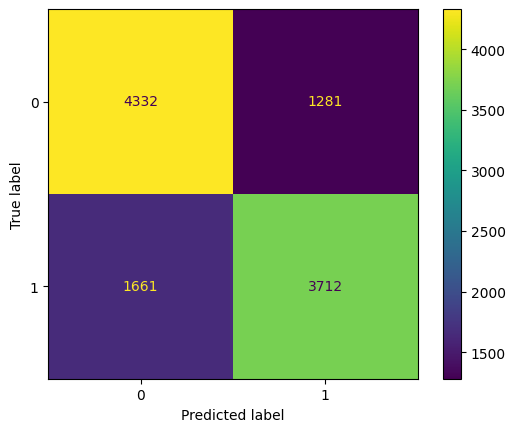

In [148]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

y_pred = classifier_KNN.predict(X_val)
print(classification_report(y_val, y_pred))

cm = confusion_matrix(y_val, y_pred)
ConfusionMatrixDisplay(cm).plot()

              precision    recall  f1-score   support

           0       0.71      0.78      0.75      5613
           1       0.75      0.68      0.71      5373

    accuracy                           0.73     10986
   macro avg       0.73      0.73      0.73     10986
weighted avg       0.73      0.73      0.73     10986



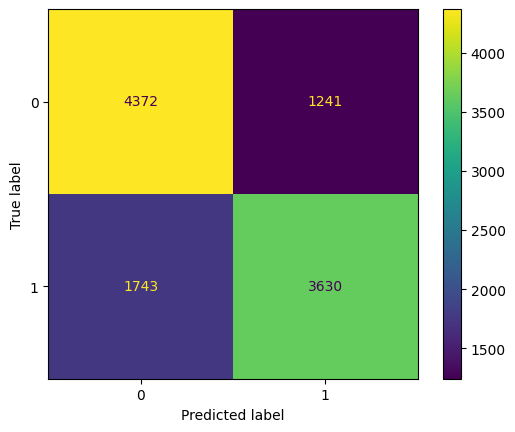

In [149]:
y_pred = classifier_log_reg.predict(X_val)
print(classification_report(y_val, y_pred))
cm = confusion_matrix(y_val, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [154]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

model_tree_reg = DecisionTreeClassifier(max_depth=4)
model_tree_reg.fit(X_train, y_train)
print('age	gender	height	ap_hi	cholesterol	gluc	smoke	alco	active	BMI')
model_tree_reg.feature_importances_

age	gender	height	ap_hi	cholesterol	gluc	smoke	alco	active	BMI


array([0.1275499 , 0.        , 0.        , 0.78775533, 0.0749394 ,
       0.00706978, 0.        , 0.        , 0.        , 0.00268559])

              precision    recall  f1-score   support

           0       0.74      0.73      0.73      5613
           1       0.72      0.73      0.73      5373

    accuracy                           0.73     10986
   macro avg       0.73      0.73      0.73     10986
weighted avg       0.73      0.73      0.73     10986



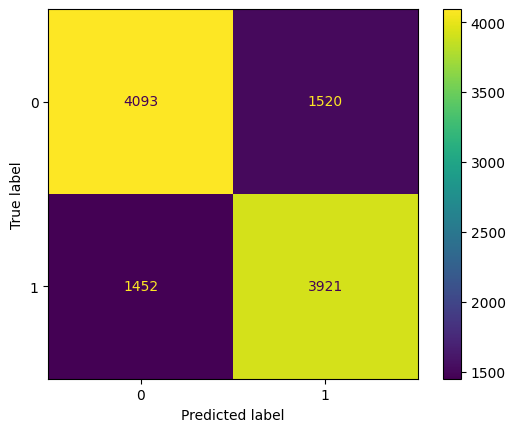

In [155]:

y_pred = model_tree_reg.predict(X_val)

print(classification_report(y_val, y_pred))
cm = confusion_matrix(y_val, y_pred)
ConfusionMatrixDisplay(cm).plot()



In [166]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

X, y = df_heart.drop(['cardio','Cardio','Chol', 'Smoke', 'BMI_grupp','BP_group'], axis=1), df_heart['cardio']
# splitta i test och träning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


pipe = Pipeline(steps=[("clf", xgb.XGBClassifier(random_state=42))])

from skopt import BayesSearchCV
from skopt.space import Real, Integer

search_space = {
    "clf__max_depth": Integer(2, 8),
    "clf__learning_rate": Real(0.001, 1.0, prior="log-uniform"),
    "clf__subsample": Real(0.5, 1),
    "clf__colsample_bytree": Real(0.5, 1.0),
    "clf__colsample_bylevel": Real(0.5, 1.0),
    "clf__colsample_bynode": Real(0.5, 1.0),
    "clf__reg_alpha": Real(0, 10.0),
    "clf__reg_lambda": Real(0, 10.0),
    "clf__gamma": Real(0, 10.0),
}

# accuracy not good if dataset is imbalanced
optimizer = BayesSearchCV(pipe, search_space, cv=3, n_iter=10, scoring="accuracy", random_state=42)

In [167]:
optimizer.fit(X_train, y_train)

BayesSearchCV(cv=3,
              estimator=Pipeline(steps=[('clf',
                                         XGBClassifier(base_score=None,
                                                       booster=None,
                                                       callbacks=None,
                                                       colsample_bylevel=None,
                                                       colsample_bynode=None,
                                                       colsample_bytree=None,
                                                       device=None,
                                                       early_stopping_rounds=None,
                                                       enable_categorical=False,
                                                       eval_metric=None,
                                                       feature_types=None,
                                                       gamma=None,
                                                       grow_policy=None,
                                                       importance_type=None,
                                                       interaction_constraints=...
                             'clf__learning_rate': Real(low=0.001, high=1.0, prior='log-uniform', transform='normalize'),
                             'clf__max_depth': Integer(low=2, high=8, prior='uniform', transform='normalize'),
                             'clf__reg_alpha': Real(low=0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__reg_lambda': Real(low=0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__subsample': Real(low=0.5, high=1, prior='uniform', transform='normalize')})

In [168]:
optimizer.best_estimator_
print("Scores")
print(f"score metrics for training data: {optimizer.best_score_=:.2f}")
print(f"score metrics for test data: {optimizer.score(X_test, y_test)=:.2f}")

Scores
score metrics for training data: optimizer.best_score_=0.73
score metrics for test data: optimizer.score(X_test, y_test)=0.73
